In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20})

In [2]:
from data import read_count

In [3]:
cameras = {'All Saints Square': 'all_saints_square',
           'Grodzka': 'grodzka',
           'Wawel': 'wawel',
           'Podgorze Market Square': 'podgorze_market_square'
          }

## Model performance metrics

In [4]:
def print_metrics(camera, gt_data, ref_data):
    
    mae = mean_absolute_error(gt_data, ref_data)
    rmse = np.sqrt(mean_squared_error(gt_data, ref_data))
#    print("\t MAE = {:.2f} \t RMSE = {:.2f}".format(
#        mean_absolute_error(gt_data, ref_data),
#        np.sqrt(mean_squared_error(gt_data, ref_data))
#        ))
    return {'mae': round(mae,2), 'rmse': round(rmse,2)}

In [5]:
def metrics(camera):
    ground_truth = read_count(f'data/{cameras[camera]}-ground_truth.csv')
    ground_truth.set_index('date', inplace=True)
    ground_truth.columns = ['ground_truth']

    yolo = read_count(f'data/{cameras[camera]}-2020.csv')
    yolo = yolo[['date', 'person']]
    yolo.set_index('date', inplace=True)
    yolo.columns = ['yolo']
    
    yolo_tiled = read_count(f'data/{cameras[camera]}-2020-split6.csv')
    yolo_tiled = yolo_tiled[['date', 'person']]
    yolo_tiled.set_index('date', inplace=True)
    yolo_tiled.columns = ['yolo_tiled']

    ssd = read_count(f'data/{cameras[camera]}-2020-SSD.csv')
    ssd = ssd[['date', 'person']]
    ssd.set_index('date', inplace=True)
    ssd.columns = ['SSD']

    faster = read_count(f'data/{cameras[camera]}-2020-FasterRCNN.csv')
    faster = faster[['date', 'person']]
    faster.set_index('date', inplace=True)
    faster.columns = ['FasterRCNN']
       
    # merge datasets
    df = ground_truth
    df = df.merge(yolo, left_index=True, right_index=True)
    df = df.merge(yolo_tiled, left_index=True, right_index=True)
    df = df.merge(ssd, left_index=True, right_index=True)
    df = df.merge(faster, left_index=True, right_index=True)
    
    # convert to lists
    gt = df['ground_truth'].values.tolist()
    yolo = df['yolo'].values.tolist()
    yolo_tiled = df['yolo_tiled'].values.tolist()
    ssd = df['SSD'].values.tolist()
    faster = df['FasterRCNN'].values.tolist()
    
    data = {}
    #print(f'{camera} camera ---')
    #print(' YOLO \t', end='')
    data['YOLO'] = print_metrics(camera, gt, yolo)
    
    #print(' SSD \t', end='')
    #print_metrics(camera, gt, ssd)
    data['SSD'] = print_metrics(camera, gt, ssd)
    
    #print(' FasterRCNN', end='')
    #print_metrics(camera, gt, faster)
    data['FasterRCNN'] =  print_metrics(camera, gt, faster)
    
    #print(' YOLO_tiled', end='')
    #print_metrics(camera, gt, yolo_tiled)
    data['YOLO_tiled'] = print_metrics(camera, gt, yolo_tiled)
    
    return data

In [6]:
import json

data = {}
for camera in cameras:
    data[camera] = metrics(camera)
    
print(json.dumps(data, indent=4))

{
    "All Saints Square": {
        "YOLO": {
            "mae": 10.48,
            "rmse": 18.38
        },
        "SSD": {
            "mae": 25.34,
            "rmse": 31.46
        },
        "FasterRCNN": {
            "mae": 9.41,
            "rmse": 15.68
        },
        "YOLO_tiled": {
            "mae": 8.08,
            "rmse": 14.35
        }
    },
    "Grodzka": {
        "YOLO": {
            "mae": 5.48,
            "rmse": 11.57
        },
        "SSD": {
            "mae": 6.91,
            "rmse": 13.75
        },
        "FasterRCNN": {
            "mae": 5.84,
            "rmse": 10.5
        },
        "YOLO_tiled": {
            "mae": 4.03,
            "rmse": 8.02
        }
    },
    "Wawel": {
        "YOLO": {
            "mae": 3.29,
            "rmse": 6.18
        },
        "SSD": {
            "mae": 3.59,
            "rmse": 6.31
        },
        "FasterRCNN": {
            "mae": 3.36,
            "rmse": 5.81
        },
        "YOLO_tiled": {

In [7]:
df_metrics = pd.DataFrame.from_dict(data)
df_metrics

All Saints Square                       Grodzka  \
YOLO        {'mae': 10.48, 'rmse': 18.38}  {'mae': 5.48, 'rmse': 11.57}   
SSD         {'mae': 25.34, 'rmse': 31.46}  {'mae': 6.91, 'rmse': 13.75}   
FasterRCNN   {'mae': 9.41, 'rmse': 15.68}   {'mae': 5.84, 'rmse': 10.5}   
YOLO_tiled   {'mae': 8.08, 'rmse': 14.35}   {'mae': 4.03, 'rmse': 8.02}   

                                  Wawel       Podgorze Market Square  
YOLO        {'mae': 3.29, 'rmse': 6.18}  {'mae': 2.65, 'rmse': 4.79}  
SSD         {'mae': 3.59, 'rmse': 6.31}  {'mae': 3.65, 'rmse': 5.77}  
FasterRCNN  {'mae': 3.36, 'rmse': 5.81}   {'mae': 2.9, 'rmse': 4.65}  
YOLO_tiled   {'mae': 3.0, 'rmse': 5.65}   {'mae': 2.0, 'rmse': 3.81}

#### Convert dictionary to dataframe

In [8]:
x = {'model':[], 'camera': [], 'MAE': [], 'RMSE': []}
for camera, value in data.items():
    for model, value_model in value.items():
        x['camera'].append(camera)
        x['model'].append(model)
        for metric, value_metric in value_model.items():
            x[metric.upper()].append(value_metric)
#print(json.dumps(x, indent=4))
df_metrics = pd.DataFrame.from_dict(x)
df_metrics

model                  camera    MAE   RMSE
0         YOLO       All Saints Square  10.48  18.38
1          SSD       All Saints Square  25.34  31.46
2   FasterRCNN       All Saints Square   9.41  15.68
3   YOLO_tiled       All Saints Square   8.08  14.35
4         YOLO                 Grodzka   5.48  11.57
5          SSD                 Grodzka   6.91  13.75
6   FasterRCNN                 Grodzka   5.84  10.50
7   YOLO_tiled                 Grodzka   4.03   8.02
8         YOLO                   Wawel   3.29   6.18
9          SSD                   Wawel   3.59   6.31
10  FasterRCNN                   Wawel   3.36   5.81
11  YOLO_tiled                   Wawel   3.00   5.65
12        YOLO  Podgorze Market Square   2.65   4.79
13         SSD  Podgorze Market Square   3.65   5.77
14  FasterRCNN  Podgorze Market Square   2.90   4.65
15  YOLO_tiled  Podgorze Market Square   2.00   3.81

#### Read timing data

In [9]:
df_t = pd.read_csv('data/timing2.csv', skiprows=1)
#df_t.model = df_t.model.astype('category')
df_t

model                  camera  time
0         YOLO       All Saints Square  0.77
1         YOLO                 Grodzka  0.75
2         YOLO                   Wawel  0.73
3         YOLO  Podgorze Market Square  0.75
4          SSD       All Saints Square  1.48
5          SSD                 Grodzka  1.48
6          SSD                   Wawel  1.46
7          SSD  Podgorze Market Square  1.42
8   FasterRCNN       All Saints Square  8.55
9   FasterRCNN                 Grodzka  7.90
10  FasterRCNN                   Wawel  8.47
11  FasterRCNN  Podgorze Market Square  8.47
12  YOLO_tiled       All Saints Square  3.78
13  YOLO_tiled                 Grodzka  3.01
14  YOLO_tiled                   Wawel  2.27
15  YOLO_tiled  Podgorze Market Square  4.07

#### Merge dataframes

In [10]:
df2 = pd.merge(df_t, df_metrics, left_on=['model', 'camera'], right_on=['model', 'camera'])
df2.sort_values(by=['camera', 'model'])

model                  camera  time    MAE   RMSE
8   FasterRCNN       All Saints Square  8.55   9.41  15.68
4          SSD       All Saints Square  1.48  25.34  31.46
0         YOLO       All Saints Square  0.77  10.48  18.38
12  YOLO_tiled       All Saints Square  3.78   8.08  14.35
9   FasterRCNN                 Grodzka  7.90   5.84  10.50
5          SSD                 Grodzka  1.48   6.91  13.75
1         YOLO                 Grodzka  0.75   5.48  11.57
13  YOLO_tiled                 Grodzka  3.01   4.03   8.02
11  FasterRCNN  Podgorze Market Square  8.47   2.90   4.65
7          SSD  Podgorze Market Square  1.42   3.65   5.77
3         YOLO  Podgorze Market Square  0.75   2.65   4.79
15  YOLO_tiled  Podgorze Market Square  4.07   2.00   3.81
10  FasterRCNN                   Wawel  8.47   3.36   5.81
6          SSD                   Wawel  1.46   3.59   6.31
2         YOLO                   Wawel  0.73   3.29   6.18
14  YOLO_tiled                   Wawel  2.27   3.00   5.65

#### Mean values

In [13]:
df2.groupby('model').mean()

time     MAE     RMSE
model                              
FasterRCNN  8.3475  5.3775   9.1600
SSD         1.4600  9.8725  14.3225
YOLO        0.7500  5.4750  10.2300
YOLO_tiled  3.2825  4.2775   7.9575

## Plot charts

In [291]:
plt.style.use('seaborn-notebook')     # switch to seaborn style
#plt.style.use('default')     # switches back to matplotlib style
print(plt.style.available)
#sns.set(style="whitegrid")
#sns.set_palette("bright")
# https://www.codecademy.com/articles/seaborn-design-i
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 30})

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


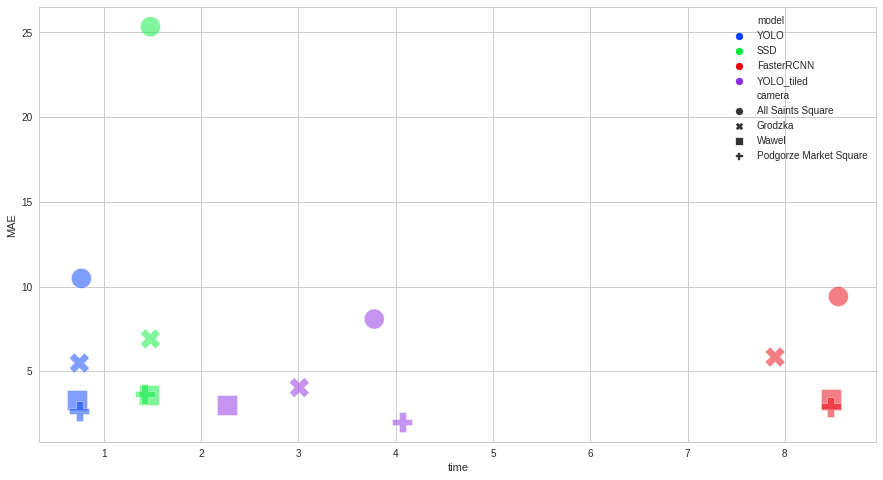

In [294]:
df3=df2[df2.camera=='Grodzka']
ax = sns.scatterplot(x="time", y="MAE", data=df2, hue='model', 
                     s=400, marker="o", alpha=.5, style='camera')
                    #size='time');
#ax2 = sns.scatterplot(x="time", y="RMSE", data=df2, hue='camera', s=300, marker="D");

## Model timing per image

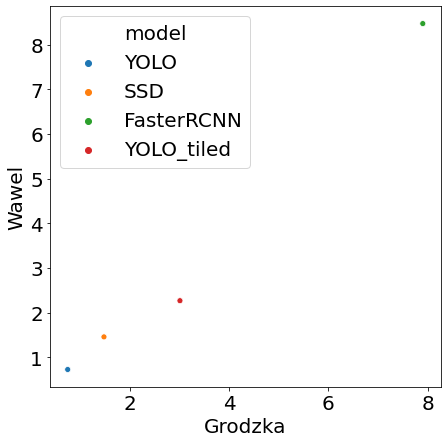

In [130]:
df_t = pd.read_csv('data/timing.csv', skiprows=2) #, index_col='model')
df_t = df_t[:-1]  # exclude last info row
ax = sns.scatterplot(x="Grodzka", y="Wawel", data=df_t, hue='model');

In [126]:
#df_t.groupby("model").plot()

https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category/39251401#39251401

http://seaborn.pydata.org/generated/seaborn.pairplot.html